In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Generating body acc, grad ned acc, grad body acc

In [2]:

def gen_grad_acc(df):
    
    df3=df
    import transforms3d as tf3d
    
    acc_ned_grad=np.zeros((len(df3),3))

    acc_ned_grad[:,0]=np.diff(df3['speed[0]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,0]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,0]])

    acc_ned_grad[:,1]=np.diff(df3['speed[1]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,1]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,1]])


    acc_ned_grad[:,2]=np.diff(df3['speed[2]'],append=0)/np.diff(df3["t"],append=4e-3)

    acc_ned_grad[:,2]=np.array([i  if abs(i)<30 else 0 for i in acc_ned_grad[:,2]])

    acc_body_grad=np.zeros((len(df3),3))

    for i in df3.index:
        q0,q1,q2,q3=df3["q[0]"][i],df3["q[1]"][i],df3["q[2]"][i],df3["q[3]"][i]
    #     print(i,q0,q1,q2,q3)
        R=tf3d.quaternions.quat2mat(np.array([q0,q1,q2,q3]))
        acc_body_grad[i]=R.T@(acc_ned_grad[i].reshape((3,1))).flatten()
        
    
    df3['acc_ned_grad[0]'],df3['acc_ned_grad[1]'],df3['acc_ned_grad[2]']=acc_ned_grad.T
    df3['acc_body_grad[0]'],df3['acc_body_grad[1]'],df3['acc_body_grad[2]']=acc_body_grad.T
    
    return df3



In [3]:
log1=pd.read_csv('./logs/avion/vol1/log_real.csv')
log2=pd.read_csv('./logs/avion/vol2/log_real.csv')
log3=pd.read_csv('./logs/avion/vol3/log_real.csv')


In [4]:

log1=gen_grad_acc(log1)
log2=gen_grad_acc(log2)
log3=gen_grad_acc(log3)



log1.to_csv('./logs/avion/vol1/log_real_processed.csv')
log2.to_csv('./logs/avion/vol2/log_real_processed.csv')
log3.to_csv('./logs/avion/vol3/log_real_processed.csv')

# Analyse to cut time 

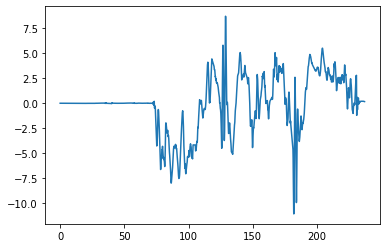

In [5]:
plt.plot(log1.t,log1['speed[2]'])

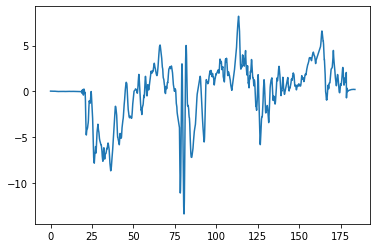

In [6]:
plt.plot(log2.t,log2['speed[2]'])

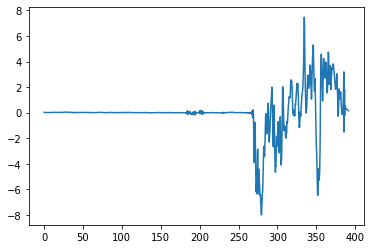

In [7]:
plt.plot(log3.t,log3['speed[2]'])

# Cutting time

In [8]:
log1_r=log1[log1["t"]>75]
log1_r=log1_r[log1_r["t"]<225]

log2_r=log2[log2["t"]>20]
log2_r=log2_r[log2_r['t']<175]

log3_r=log3[log3["t"]>275]
log3_r=log3_r[log3_r['t']<370]

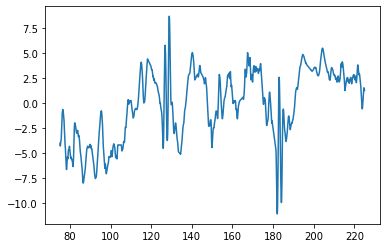

In [9]:
plt.plot(log1_r.t,log1_r['speed[2]'])

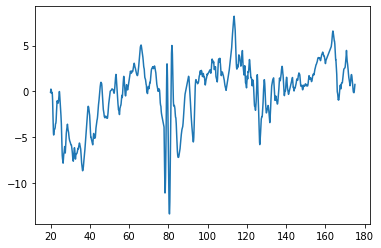

In [10]:
plt.plot(log2_r.t,log2_r['speed[2]'])

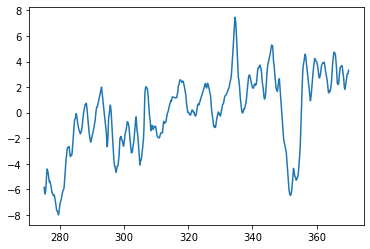

In [11]:
plt.plot(log3_r.t,log3_r['speed[2]'])

# Building agregated dataset

In [12]:
log1_r["t"]=log1_r["t"]-log1_r['t'].min()
log2_r["t"]=log2_r["t"]-log2_r['t'].min()+5e-3+log1_r["t"].max()
log3_r["t"]=log3_r["t"]-log3_r['t'].min()+5e-3+log2_r["t"].max()


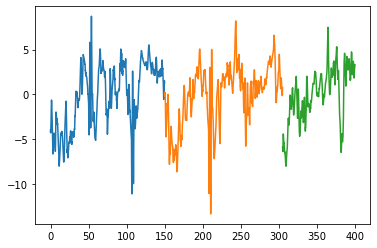

In [13]:
plt.plot(log1_r.t,log1_r['speed[2]'])
plt.plot(log2_r.t,log2_r['speed[2]'])
plt.plot(log3_r.t,log3_r['speed[2]'])

In [14]:
df4=pd.concat([log1_r,log2_r,log3_r])

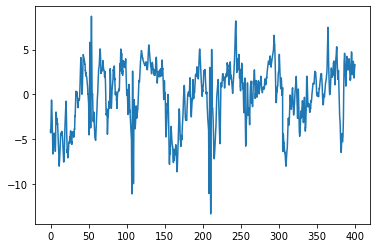

In [15]:
plt.plot(df4.t,df4['speed[2]'])


In [19]:
df4=df4.reset_index()
df4.to_csv('./logs/avion/vol123/log_real.csv')

(-15.0, 15.0)

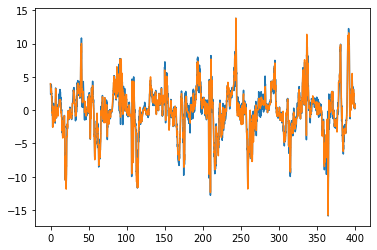

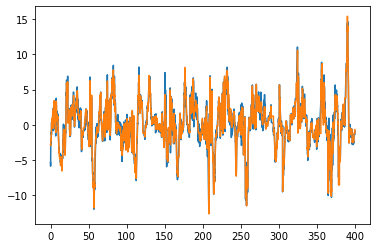

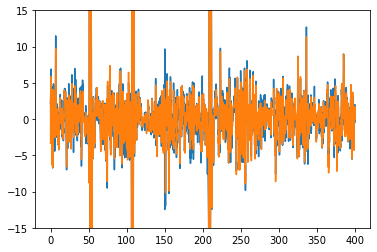

In [20]:
[(plt.figure(),plt.plot(df4["t"],df4['acc[%i]'%(i)]),plt.plot(df4["t"],df4['acc_ned_grad[%i]'%(i)])) for i in range(3)]
plt.gca().set_ylim(-15,15)